# **k-Nearest Neighbours Classifier**

In [ ]:
!pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 42.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


# Import libraries

In [ ]:
import numpy as np # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization
import sklearn # machine learning

# Import dataset

In [ ]:
# import breat cancer dataset with sklearn
from sklearn.datasets import load_breast_cancer #importer la base de donnée
iris=load_breast_cancer()  #stocker la base daans une variable
print(iris.keys)  # afficher les cles
#print(iris.DESCR)
print(iris)

<built-in method keys of Bunch object at 0x7a19ca268270>
{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1

# Dataset to Pandas DataFrame

In [ ]:
# Put data into a pandas dataframe with the target variable (which we will try to predict) as the last column
df_iris=pd.DataFrame(iris.data, columns=iris.feature_names) #creer une variable et remetles donnnées data avec la fonction dataFramme et futur_names permet de reéutlisés le renomage par defaut
df_iris['target']=iris.target #  creer une colonne target et renome le target de iris avec iris.target
print(df_iris)


     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [ ]:
# First 10 value of the dataset
print(df_iris.head(10))


   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   
5        12.45         15.70           82.57      477.1          0.12780   
6        18.25         19.98          119.60     1040.0          0.09463   
7        13.71         20.83           90.20      577.9          0.11890   
8        13.00         21.82           87.50      519.8          0.12730   
9        12.46         24.04           83.97      475.9          0.11860   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760         0.30010              0.14710         0.2419   
1           0

# Exploratory data analysis

In [ ]:
# Shape of the dataset (nb of rows and columns)
print(df_iris.shape)

# Name of the columns
print(df_iris.columns)


(569, 31)
Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')


In [ ]:
# Print dataset info
df_iris.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
# Description of Iris dataset (mean, std, min, max, quartiles)
df_iris.describe() # affiche les desrcibptions du dataframe


mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       mean symmetry  mean fractal dimension  ...  worst radius  \
count     569.000000              569.000000  ...    569.000000   
mean        0.181162                0.062798  ...     16.269190   
std         0.027414                0.007060  ...      4.833242   
min         0.106000                0.049960  ...      7.930000   
25%         0.161900                0.057700  ...     13.010000   
50%         0.179200                0.061540  ...     14.970000   
75%         0.195700                0.066120  ...     18.790000   
max         0.304000                0.097440  ...     36.040000   

       worst texture  worst perimeter   worst area  worst smoothness  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%        29.720000       125.400000  1084.000000          0.146000   
max        49.540000       251.200000  4254.000000          0.222600   

       worst compactness  worst concavity  worst concave points  \
count         569.000000       569.000000            569.000000   
mean            0.254265         0.272188              0.114606   
std             0.157336         0.208624              0.065732   
min             0.027290         0.000000              0.000000   
25%             0.147200         0.114500              0.064930   
50%             0.211900         0.226700              0.099930   
75%             0.339100         0.382900              0.161400   
max             1.058000         1.252000              0.291000   

       worst symmetry  worst fractal dimension  
count      569.000000               569.000000  
mean         0.290076                 0.083946  
std          0.061867                 0.018061  
min          0.156500                 0.055040  
25%          0.250400                 0.071460  
50%          0.282200                 0.080040  
75%          0.317900                 0.092080  
max          0.663800                 0.207500  

[8 rows x 30 columns]

### Frequency distribution of values in categorical variables

In [ ]:
# Names of the target values
print(iris.target_names)

# Count of each target value # compter chaque valeur de cible
print(df_iris['target'].value_counts())


# Same as above but in percentage
print(df_iris['target'].value_counts(normalize=True)) # met les données en pourcentage



['malignant' 'benign']
1    357
0    212
Name: target, dtype: int64
1    0.627417
0    0.372583
Name: target, dtype: float64


We can see that the dataset in balanced in terms of its classes.

### Missing values in variables

In [ ]:
# Number of missing values in each column
MissingValues=df_iris.isnull().sum() #isnull() trouve les valeurs null et sum() fait la somme des colonnes null
print(MissingValues)


mean radius                  0
mean texture                 0
mean perimeter               0
mean area                    0
mean smoothness              0
mean compactness             0
mean concavity               0
mean concave points          0
mean symmetry                0
mean fractal dimension       0
radius error                 0
texture error                0
perimeter error              0
area error                   0
smoothness error             0
compactness error            0
concavity error              0
concave points error         0
symmetry error               0
fractal dimension error      0
worst radius                 0
worst texture                0
worst perimeter              0
worst area                   0
worst smoothness             0
worst compactness            0
worst concavity              0
worst concave points         0
worst symmetry               0
worst fractal dimension      0
target                     569
dtype: int64


## Correlation between variables

In [ ]:
# Correlation matrix between all the features
df_iris.corr() #calcul la correlation par paire entre toutes les entités du dataframe

<ipython-input-20-504efb58f01b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_iris.corr() #calcul la correlation par paire entre toutes les entités du dataframe


mean radius  mean texture  mean perimeter  mean area  \
mean radius                 1.000000      0.323782        0.997855   0.987357   
mean texture                0.323782      1.000000        0.329533   0.321086   
mean perimeter              0.997855      0.329533        1.000000   0.986507   
mean area                   0.987357      0.321086        0.986507   1.000000   
mean smoothness             0.170581     -0.023389        0.207278   0.177028   
mean compactness            0.506124      0.236702        0.556936   0.498502   
mean concavity              0.676764      0.302418        0.716136   0.685983   
mean concave points         0.822529      0.293464        0.850977   0.823269   
mean symmetry               0.147741      0.071401        0.183027   0.151293   
mean fractal dimension     -0.311631     -0.076437       -0.261477  -0.283110   
radius error                0.679090      0.275869        0.691765   0.732562   
texture error              -0.097317      0.386358       -0.086761  -0.066280   
perimeter error             0.674172      0.281673        0.693135   0.726628   
area error                  0.735864      0.259845        0.744983   0.800086   
smoothness error           -0.222600      0.006614       -0.202694  -0.166777   
compactness error           0.206000      0.191975        0.250744   0.212583   
concavity error             0.194204      0.143293        0.228082   0.207660   
concave points error        0.376169      0.163851        0.407217   0.372320   
symmetry error             -0.104321      0.009127       -0.081629  -0.072497   
fractal dimension error    -0.042641      0.054458       -0.005523  -0.019887   
worst radius                0.969539      0.352573        0.969476   0.962746   
worst texture               0.297008      0.912045        0.303038   0.287489   
worst perimeter             0.965137      0.358040        0.970387   0.959120   
worst area                  0.941082      0.343546        0.941550   0.959213   
worst smoothness            0.119616      0.077503        0.150549   0.123523   
worst compactness           0.413463      0.277830        0.455774   0.390410   
worst concavity             0.526911      0.301025        0.563879   0.512606   
worst concave points        0.744214      0.295316        0.771241   0.722017   
worst symmetry              0.163953      0.105008        0.189115   0.143570   
worst fractal dimension     0.007066      0.119205        0.051019   0.003738   

                         mean smoothness  mean compactness  mean concavity  \
mean radius                     0.170581          0.506124        0.676764   
mean texture                   -0.023389          0.236702        0.302418   
mean perimeter                  0.207278          0.556936        0.716136   
mean area                       0.177028          0.498502        0.685983   
mean smoothness                 1.000000          0.659123        0.521984   
mean compactness                0.659123          1.000000        0.883121   
mean concavity                  0.521984          0.883121        1.000000   
mean concave points             0.553695          0.831135        0.921391   
mean symmetry                   0.557775          0.602641        0.500667   
mean fractal dimension          0.584792          0.565369        0.336783   
radius error                    0.301467          0.497473        0.631925   
texture error                   0.068406          0.046205        0.076218   
perimeter error                 0.296092          0.548905        0.660391   
area error                      0.246552          0.455653        0.617427   
smoothness error                0.332375          0.135299        0.098564   
compactness error               0.318943          0.738722        0.670279   
concavity error                 0.248396          0.570517        0.691270   
concave points error            0.380676          0.642262        0.683260   
symmetry error                 

<ipython-input-21-3dda1b9628ec>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_iris.corr(), annot=True, cmap='coolwarm')


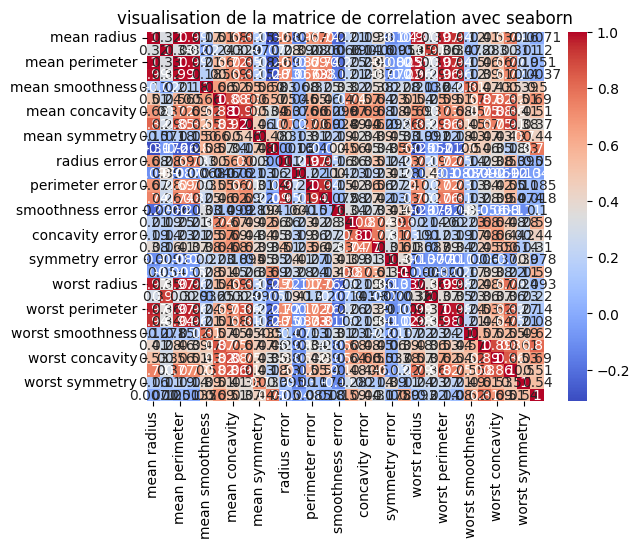

In [ ]:
# Heatmap of the correlation matrix  : consiste a representer les donnees sous forme de couleur en utilisant valeurs numeriqie
#utlisation de seaborne et matplotlib pour le faire
plt.title("visualisation de la matrice de correlation avec seaborn")
sns.heatmap(df_iris.corr(), annot=True, cmap='coolwarm')
plt.show()


In [ ]:
# print the most correlated features with the target variable (absolute value)
# affiche les caractéristiques les plus corrélées avec la variable cible (valeur absolue)
print(df_iris.corr()['target'].abs().sort_values(ascending=False))

target                     1.000000
worst concave points       0.793566
worst perimeter            0.782914
mean concave points        0.776614
worst radius               0.776454
mean perimeter             0.742636
worst area                 0.733825
mean radius                0.730029
mean area                  0.708984
mean concavity             0.696360
worst concavity            0.659610
mean compactness           0.596534
worst compactness          0.590998
radius error               0.567134
perimeter error            0.556141
area error                 0.548236
worst texture              0.456903
worst smoothness           0.421465
worst symmetry             0.416294
mean texture               0.415185
concave points error       0.408042
mean smoothness            0.358560
mean symmetry              0.330499
worst fractal dimension    0.323872
compactness error          0.292999
concavity error            0.253730
fractal dimension error    0.077972
smoothness error           0

### Plot some data

In [ ]:
# Convert the target into categorical data #convertir l acible en donnee categoriel
#df_iris['target']=df_iris['target'].astype('int64')
df_iris['target'] = df_iris['target'].map({0: 'Begnin', 1: 'Malignant'})
print(df_iris['target'])
# Plot the 2 most correlated features with the target variable =>tracer les entité les plus colorées
sns.scatterplot(data=df_iris, x='worts perimeter', y='worst concave', hue='target', palette= 'prism')
plt.show()

# Convert the target back to numerical



0         Begnin
1         Begnin
2         Begnin
3         Begnin
4         Begnin
         ...    
564       Begnin
565       Begnin
566       Begnin
567       Begnin
568    Malignant
Name: target, Length: 569, dtype: object


ValueError: Could not interpret value `worts perimeter` for `x`. An entry with this name does not appear in `data`.

# Split data into separate training and test sets

In [ ]:
# Split the dataset into training and testing sets


In [ ]:
# Check the shapes


In [ ]:
# Print the number of unique values


# Data Encoding

In [ ]:
# check data types in X_train


All data is numerical, so we don't need to do any encoding.

# K-Nearest Neighbours Classifier

<!-- Add an image link in markdown in a smaller size: -->
![knn](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/KnnClassification.svg/220px-KnnClassification.svg.png)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Create a KNN classifier with 8 neighbors

# Train the model using the training sets


# Accuracy of the model on the training set


In [ ]:
# Predict the response for test dataset

# Accuracy of the model on the testing set


## Plot the accuracy of the model on training and testing set for different k neighbours

In [ ]:
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 15


# Classification Report

**Classification report** is another way to evaluate the classification model performance. It displays the  **precision**, **recall**, **f1** and **support** scores for the model. I have described these terms in later.

We can print a classification report as follows:-

In [ ]:
# Plot the classification report for k=8
from sklearn.metrics import classification_report


# Confusion matrix

A confusion matrix helps summarize the performance of a classification algorithm. A confusion matrix will give a clear picture of the perfomance of a classification model as well as the types of errors produced by the it. <br>
It gives a summary of correct and incorrect predictions broken down by each category.


Four types of outcomes are possible while evaluating a classification model performance :


**True Positives (TP)** – We predict that an observation belongs to a certain class *x* and the observation actually belongs to that class *x*.


**True Negatives (TN)** – We predict that an observation does not belong to a certain class *x* and the observation actually does not belong to that class *x*.


**False Positives (FP)** – We predict that an observation belongs to a certain class *x* but the observation actually **does not belong** to that class *x*. This type of error is called Type I error.



**False Negatives (FN)** – We predict that an observation does not belong to a certain class *x* but the observation **actually belongs** to that class *x*. This is a very serious error and it is called Type II error.



In [ ]:
print("Confusion Matrice for K=8:")
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

# Cross validation with 5 splits


# ROC and AUC

The ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s. By analogy, Higher the AUC, better the model is at distinguishing between patients with disease and no disease.

In [ ]:
# Receiver Oerating Characteristic (ROC) and Area Under the Curve (AUC)
from sklearn.metrics import roc_curve, auc


# Decision Boundary

Decision Boundaries shows the decision regions of the classifier. It is a line or a curve that separates the decision regions of the classifier.

In [ ]:
# Print decision boundary for KNN classifier over the most correlated features
from sklearn.inspection import DecisionBoundaryDisplay

# Decision boundary for worst concave points vs worst perimeter


# Principal Component Analysis

Principal Component Analysis is a dimensionality reduction technique. It is used to reduce the number of features in a dataset. It is used to reduce the complexity of the model and to reduce the training time. It is also used to visualise high dimensional data.

In [ ]:
from sklearn.decomposition import PCA


# References :
1. https://scikit-learn.org/
2. https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)
3. https://www.kaggle.com/code/prashant111/knn-classifier-tutorial